In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


data=pd.read_csv("Daily_SolarDKA.csv")

FEATURES=['Daily', 'Speed', 'Temperature', 'Humidity', 'WindDirection','Rainfall']
TARGET='Global_Horizontal_Radiation'

In [2]:
dat1=pd.read_csv("Hourly_101-Site_DKA-WeatherStation_04-2016_04-2023.csv")

In [3]:
dat2=pd.read_csv("SolarPredictionProcessed.csv")

In [4]:
dat1

,Timestamp,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
0,01/04/2016 0:00,0.736957,15.695308,40.470138,2.656972,1.036526,246.619743,0.0,3.082348,1.688183
1,01/04/2016 1:00,1.116721,15.458908,38.914876,2.409956,0.803828,54.343306,0.0,2.691869,1.369937
2,01/04/2016 2:00,0.998921,15.686191,38.183398,2.349933,0.776835,68.148311,0.0,2.676784,1.350582
3,01/04/2016 3:00,1.076415,14.938666,42.768116,3.003918,1.336927,168.825974,0.0,3.319331,1.908877
4,01/04/2016 4:00,1.448044,13.401448,51.339947,3.034377,1.368935,228.932444,0.0,3.422762,2.012935
...,...,...,...,...,...,...,...,...,...,...
60879,20/04/2023 8:00,NaN,14.188640,64.655864,382.376563,51.124988,45.010391,0.0,437.270081,67.044721
60880,20/04/2023 9:00,NaN,16.354535,53.895436,607.264755,72.975770,44.390293,0.0,686.062815,101.681513
60881,20/04/2023 10:00,NaN,18.310824,47.792000,777.072886,81.682877,44.257559,0.0,919.935577,103.849059
60882,20/04/2023 11:00,NaN,19.750647,42.398185,898.283981,72.727289,43.915293,0.0,1097.268448,100.495574


In [5]:
dat2

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1.475229e+09,9/29/2016 0:00,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,6:13:00,18:13:00
1,1.475229e+09,9/29/2016 0:00,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,6:13:00,18:13:00
2,1.475229e+09,9/29/2016 0:00,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,6:13:00,18:13:00
3,1.475228e+09,9/29/2016 0:00,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,6:13:00,18:13:00
4,1.475228e+09,9/29/2016 0:00,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,6:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32688,1.480588e+09,12/01/2016 0:00,0:20:04,1.22,44.0,30.43,102.0,145.42,6.75,6:41:00,17:42:00
32689,1.480587e+09,12/01/2016 0:00,0:15:01,1.17,44.0,30.42,102.0,117.78,6.75,6:41:00,17:42:00
32690,1.480587e+09,12/01/2016 0:00,0:10:01,1.20,44.0,30.42,102.0,145.19,9.00,6:41:00,17:42:00
32691,1.480587e+09,12/01/2016 0:00,0:05:02,1.23,44.0,30.42,101.0,164.19,7.87,6:41:00,17:42:00


### Data preprocessing

In [6]:
# Data Preprocessing

# 2. Sorting by Timestamp
data['Daily'] = pd.to_datetime(data['Daily'])  # Convert 'Daily' column to datetime
data = data.sort_values(by='Daily')  # Sort data by timestamp

# 3. Feature Scaling/Normalization
# Select features for scaling (excluding 'Daily' and 'Global_Horizontal_Radiation')
features_to_scale = ['Speed', 'Temperature', 'Humidity', 'WindDirection', 'Rainfall']
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

#4. Adding Lag Features (Previous Time Steps)
#lag_steps = 10  # You can adjust this based on your domain knowledge
#for feature in features_to_scale:
#    for step in range(1, lag_steps + 1):
#        data[f'{feature}_lag_{step}'] = data[feature].shift(step)

# Splitting Data into Train and Test Sets
train_percentage = 0.8  # You can adjust the split ratio
train_size = int(len(data) * train_percentage)
train_data = data[:train_size]
test_data = data[train_size:]

# Save the preprocessed data (optional)
#data.to_csv('preprocessed_data.csv', index=False)



### The SVR Model (Baseline)

In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Assume 'train_data' and 'test_data' are already preprocessed as in the previous code example

# SVR Model
svr = SVR(kernel='rbf')  # Radial basis function (RBF) kernel
svr.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Predictions
svr_predictions = svr.predict(test_data[features_to_scale])

# Evaluate
mse_svr = mean_squared_error(test_data['Global_Horizontal_Radiation'], svr_predictions)
r2_svr = r2_score(test_data['Global_Horizontal_Radiation'], svr_predictions)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(test_data['Global_Horizontal_Radiation'], svr_predictions)
mape_svr = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - svr_predictions) / test_data['Global_Horizontal_Radiation'])) * 100

print(f'SVR Metrics:')
print(f'R-squared: {r2_svr:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_svr:.4f}')
print(f'Mean Absolute Error (MAE): {mae_svr:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_svr:.4f}%')


SVR Metrics:
R-squared: -0.5728
Root Mean Squared Error (RMSE): 2155.5781
Mean Absolute Error (MAE): 1892.1416
Mean Absolute Percentage Error (MAPE): 31.8475%


### The greedy search fine tuned SVR

In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assume 'train_data' and 'test_data' are already preprocessed as in the previous code example

# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],  # Epsilon for the insensitive loss function
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient for 'rbf'
}

# SVR Model with Grid Search
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Best hyperparameters
best_svr = grid_search.best_estimator_

# Predictions
svr_predictions = best_svr.predict(test_data[features_to_scale])

# Evaluate
mse_svr = mean_squared_error(test_data['Global_Horizontal_Radiation'], svr_predictions)
r2_svr = r2_score(test_data['Global_Horizontal_Radiation'], svr_predictions)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(test_data['Global_Horizontal_Radiation'], svr_predictions)
mape_svr = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - svr_predictions) / test_data['Global_Horizontal_Radiation'])) * 100

print(f'SVR Metrics (After Hyperparameter Tuning):')
print(f'R-squared: {r2_svr:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_svr:.4f}')
print(f'Mean Absolute Error (MAE): {mae_svr:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_svr:.4f}%')


SVR Metrics (After Hyperparameter Tuning):
R-squared: -0.0551
Root Mean Squared Error (RMSE): 1765.5146
Mean Absolute Error (MAE): 1500.0107
Mean Absolute Percentage Error (MAPE): 26.4404%


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assume 'train_data' and 'test_data' are already preprocessed as in the previous code example

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForest Model with Grid Search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Best hyperparameters
best_rf = grid_search.best_estimator_

# Predictions
rf_predictions = best_rf.predict(test_data[features_to_scale])

# Evaluate
mse_rf = mean_squared_error(test_data['Global_Horizontal_Radiation'], rf_predictions)
r2_rf = r2_score(test_data['Global_Horizontal_Radiation'], rf_predictions)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(test_data['Global_Horizontal_Radiation'], rf_predictions)
mape_rf = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - rf_predictions) / test_data['Global_Horizontal_Radiation'])) * 100

print(f'RandomForest Metrics (After Hyperparameter Tuning):')
print(f'R-squared: {r2_rf:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.4f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_rf:.4f}%')


RandomForest Metrics (After Hyperparameter Tuning):
R-squared: -0.2385
Root Mean Squared Error (RMSE): 1912.8579
Mean Absolute Error (MAE): 1636.8020
Mean Absolute Percentage Error (MAPE): 27.4664%


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



# Define a range of values to search over for n_estimators
n_estimators_range = [50, 100, 150, 200, 250,300]

best_mse = float('inf')
best_n_estimators = None

# Greedy search for the best n_estimators
for n_estimators in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
    
    rf_predictions = rf.predict(test_data[features_to_scale])
    mse = mean_squared_error(test_data['Global_Horizontal_Radiation'], rf_predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_n_estimators = n_estimators

# Train the RandomForestRegressor with the best n_estimators
best_rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
best_rf.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Predictions
rf_predictions = best_rf.predict(test_data[features_to_scale])

# Evaluate
r2_rf = r2_score(test_data['Global_Horizontal_Radiation'], rf_predictions)
rmse_rf = np.sqrt(best_mse)
mae_rf = mean_absolute_error(test_data['Global_Horizontal_Radiation'], rf_predictions)
mape_rf = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - rf_predictions) / test_data['Global_Horizontal_Radiation'])) * 100

print(f'Optimized RandomForest Metrics:')
print(f'R-squared: {r2_rf:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.4f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_rf:.4f}%')
print(f'Optimal n_estimators: {best_n_estimators}')


Optimized RandomForest Metrics:
R-squared: -0.1990
Root Mean Squared Error (RMSE): 1882.0749
Mean Absolute Error (MAE): 1595.1714
Mean Absolute Percentage Error (MAPE): 27.1026%
Optimal n_estimators: 150


### The XGBRegressor Model

In [10]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assume 'train_data' and 'test_data' are already preprocessed as in the previous code example

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Predictions
xgb_predictions = xgb_model.predict(test_data[features_to_scale])

# Evaluate
mse_xgb = mean_squared_error(test_data['Global_Horizontal_Radiation'], xgb_predictions)
r2_xgb = r2_score(test_data['Global_Horizontal_Radiation'], xgb_predictions)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(test_data['Global_Horizontal_Radiation'], xgb_predictions)
mape_xgb = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - xgb_predictions) / test_data['Global_Horizontal_Radiation'])) * 100

print(f'XGBoost Metrics:')
print(f'R-squared: {r2_xgb:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.4f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_xgb:.4f}%')


XGBoost Metrics:
R-squared: -0.8722
Root Mean Squared Error (RMSE): 2351.8315
Mean Absolute Error (MAE): 1879.3935
Mean Absolute Percentage Error (MAPE): 30.1260%


<Axes: title={'center': 'feature_importance'}>

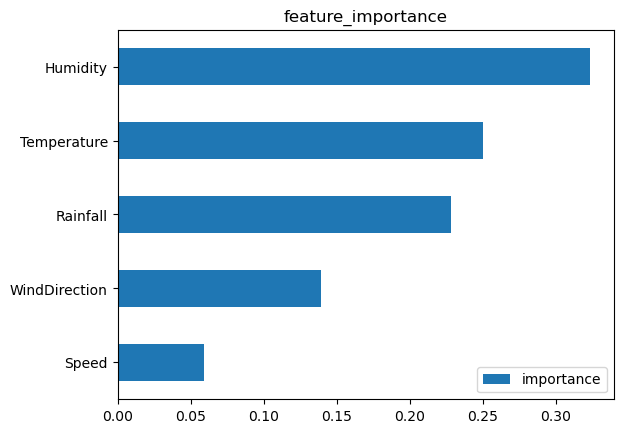

In [11]:
xgb_model.feature_importances_
f1=pd.DataFrame(data=xgb_model.feature_importances_,index=xgb_model.feature_names_in_,columns=['importance'])
f1.sort_values('importance').plot(kind='barh',title='feature_importance')

### The fine Tuned XGBRegressor

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# Define a range of values to search over for n_estimators
n_estimators_range = [50, 100, 150, 200, 250]

best_mse = float('inf')
best_n_estimators = None

# Greedy search for the best n_estimators
for n_estimators in n_estimators_range:
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)
    xgb_model.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
    
    xgb_predictions = xgb_model.predict(test_data[features_to_scale])
    mse = mean_squared_error(test_data['Global_Horizontal_Radiation'], xgb_predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_n_estimators = n_estimators

# Train the XGBoost model with the best n_estimators
best_xgb_model = XGBRegressor(n_estimators=best_n_estimators, random_state=42)
best_xgb_model.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Predictions
xgb_predictions = best_xgb_model.predict(test_data[features_to_scale])

# Evaluate
r2_xgb = r2_score(test_data['Global_Horizontal_Radiation'], xgb_predictions)
rmse_xgb = np.sqrt(best_mse)
mae_xgb = mean_absolute_error(test_data['Global_Horizontal_Radiation'], xgb_predictions)
mape_xgb = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - xgb_predictions) / test_data['Global_Horizontal_Radiation'])) * 100

print(f'Optimized XGBoost Metrics:')
print(f'R-squared: {r2_xgb:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.4f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_xgb:.4f}%')
print(f'Optimal n_estimators: {best_n_estimators}')


Optimized XGBoost Metrics:
R-squared: -0.8563
Root Mean Squared Error (RMSE): 2341.8263
Mean Absolute Error (MAE): 1890.3025
Mean Absolute Percentage Error (MAPE): 30.0203%
Optimal n_estimators: 50


### The Ensemble Model 

In [13]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# SVR Model
svr = SVR(kernel='rbf')  # Radial basis function (RBF) kernel

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Create BaggingRegressor for SVR
bagging_svr = BaggingRegressor(base_estimator=svr, n_estimators=10, random_state=42)
bagging_svr.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
bagging_svr_predictions = bagging_svr.predict(test_data[features_to_scale])

# Create BaggingRegressor for Random Forest
bagging_rf = BaggingRegressor(base_estimator=rf, n_estimators=10, random_state=42)
bagging_rf.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
bagging_rf_predictions = bagging_rf.predict(test_data[features_to_scale])

# Create BaggingRegressor for XGBoost
bagging_xgb = BaggingRegressor(base_estimator=xgb_model, n_estimators=10, random_state=42)
bagging_xgb.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
bagging_xgb_predictions = bagging_xgb.predict(test_data[features_to_scale])

# Ensemble Averaging
ensemble_predictions = (bagging_svr_predictions + bagging_rf_predictions + bagging_xgb_predictions) / 3

# Evaluate the Ensemble
mse_ensemble = mean_squared_error(test_data['Global_Horizontal_Radiation'], ensemble_predictions)
r2_ensemble = r2_score(test_data['Global_Horizontal_Radiation'], ensemble_predictions)
rmse_ensemble = np.sqrt(mse_ensemble)
mae_ensemble = mean_absolute_error(test_data['Global_Horizontal_Radiation'], ensemble_predictions)
mape_ensemble = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - ensemble_predictions) / test_data['Global_Horizontal_Radiation'])) * 100

print(f'Ensemble Metrics:')
print(f'R-squared: {r2_ensemble:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_ensemble:.4f}')
print(f'Mean Absolute Error (MAE): {mae_ensemble:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ensemble:.4f}%')


Ensemble Metrics:
R-squared: -0.4743
Root Mean Squared Error (RMSE): 2087.0345
Mean Absolute Error (MAE): 1817.4605
Mean Absolute Percentage Error (MAPE): 30.1709%


### The Tunned Ensemble Model

In [14]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error



# Define a range of values to search over for n_estimators
n_estimators_range = [10, 50, 100, 150]

best_mse = float('inf')
best_n_estimators = None

# Greedy search for the best n_estimators
for n_estimators in n_estimators_range:
    svr = SVR(kernel='rbf')  # Radial basis function (RBF) kernel
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)
    
    bagging_svr = BaggingRegressor(base_estimator=svr, n_estimators=n_estimators, random_state=42)
    bagging_rf = BaggingRegressor(base_estimator=rf, n_estimators=n_estimators, random_state=42)
    bagging_xgb = BaggingRegressor(base_estimator=xgb_model, n_estimators=n_estimators, random_state=42)
    
    bagging_svr.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
    bagging_rf.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
    bagging_xgb.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
    
    svr_predictions = bagging_svr.predict(test_data[features_to_scale])
    rf_predictions = bagging_rf.predict(test_data[features_to_scale])
    xgb_predictions = bagging_xgb.predict(test_data[features_to_scale])
    
    ensemble_predictions = (svr_predictions + rf_predictions + xgb_predictions) / 3
    
    mse = mean_squared_error(test_data['Global_Horizontal_Radiation'], ensemble_predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_n_estimators = n_estimators

# Train the ensemble with the best n_estimators
best_svr = SVR(kernel='rbf')
best_rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
best_xgb_model = XGBRegressor(n_estimators=best_n_estimators, random_state=42)

best_bagging_svr = BaggingRegressor(base_estimator=best_svr, n_estimators=best_n_estimators, random_state=42)
best_bagging_rf = BaggingRegressor(base_estimator=best_rf, n_estimators=best_n_estimators, random_state=42)
best_bagging_xgb = BaggingRegressor(base_estimator=best_xgb_model, n_estimators=best_n_estimators, random_state=42)

best_bagging_svr.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
best_bagging_rf.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
best_bagging_xgb.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

svr_predictions = best_bagging_svr.predict(test_data[features_to_scale])
rf_predictions = best_bagging_rf.predict(test_data[features_to_scale])
xgb_predictions = best_bagging_xgb.predict(test_data[features_to_scale])

ensemble_predictions = (svr_predictions + rf_predictions + xgb_predictions) / 3

# Evaluate the optimized ensemble
mse_ensemble = mean_squared_error(test_data['Global_Horizontal_Radiation'], ensemble_predictions)
r2_ensemble = r2_score(test_data['Global_Horizontal_Radiation'], ensemble_predictions)
rmse_ensemble = np.sqrt(mse_ensemble)
mae_ensemble = mean_absolute_error(test_data['Global_Horizontal_Radiation'], ensemble_predictions)
mape_ensemble = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - ensemble_predictions) / test_data['Global_Horizontal_Radiation'])) * 100

print(f'Optimized Ensemble Metrics:')
print(f'R-squared: {r2_ensemble:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_ensemble:.4f}')
print(f'Mean Absolute Error (MAE): {mae_ensemble:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ensemble:.4f}%')
print(f'Optimal n_estimators: {best_n_estimators}')


Optimized Ensemble Metrics:
R-squared: -0.3798
Root Mean Squared Error (RMSE): 2019.0133
Mean Absolute Error (MAE): 1744.1022
Mean Absolute Percentage Error (MAPE): 29.1473%
Optimal n_estimators: 150


Optimized Ensemble Metrics:
R-squared: -0.4723
Root Mean Squared Error (RMSE): 2085.5847
Mean Absolute Error (MAE): 1815.5419
Mean Absolute Percentage Error (MAPE): 30.1642%
Optimal n_estimators: 150


### SVR WITH GA

In [15]:
import random
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms


# Create a fitness function
def evaluate_svr(individual):
    C = individual[0]
    svr = SVR(kernel='rbf', C=C)
    svr.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
    svr_predictions = svr.predict(test_data[features_to_scale])
    mse = mean_squared_error(test_data['Global_Horizontal_Radiation'], svr_predictions)
    return mse,

# Define the problem type (minimization)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Define the parameter range for C
C_min = 0.1
C_max = 100.0

# Define the attributes (hyperparameters)
toolbox.register("attr_float", random.uniform, C_min, C_max)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_svr)

# Create an initial population
population = toolbox.population(n=10)

# Define the genetic algorithm parameters
ngen = 5
cxpb = 0.7
mutpb = 0.2

# Run the genetic algorithm
best_individuals = tools.selBest(population, k=1)
best_C = best_individuals[0][0]

# Train the SVR model with the best C
best_svr = SVR(kernel='rbf', C=best_C)
best_svr.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Predictions
svr_predictions = best_svr.predict(test_data[features_to_scale])

# Evaluate
r2_ge = r2_score(test_data['Global_Horizontal_Radiation'], svr_predictions)
mse_svr = mean_squared_error(test_data['Global_Horizontal_Radiation'], svr_predictions)
mape_ge = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - svr_predictions) / test_data['Global_Horizontal_Radiation'])) * 100
rmse_ge = np.sqrt(mse_svr)
print(f'Optimized SVR Metrics:')
print(f'Best C: {best_C:.4f}')


print(f'Root Mean Squared Error (RMSE): {rmse_ge:.4f}')
print(f'R-squared: {r2_ge:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ge:.4f}%')

Optimized SVR Metrics:
Best C: 35.4784
Root Mean Squared Error (RMSE): 1871.5359
R-squared: -0.1856
Mean Absolute Percentage Error (MAPE): 28.0191%


### Random Forest with GA

In [19]:
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms



# Create a fitness function
def evaluate_rf(individual):
    n_estimators = int(individual[0])
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
    rf_predictions = rf.predict(test_data[features_to_scale])
    mse = mean_squared_error(test_data['Global_Horizontal_Radiation'], rf_predictions)
    return mse,

# Define the problem type (minimization)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Define the parameter range for n_estimators
n_estimators_min = 50
n_estimators_max = 200

# Define the attributes (hyperparameters)
toolbox.register("attr_int", random.randint, n_estimators_min, n_estimators_max)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=n_estimators_min, up=n_estimators_max, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_rf)

# Create an initial population
population = toolbox.population(n=10)

# Define the genetic algorithm parameters
ngen = 5
cxpb = 0.7
mutpb = 0.2

# Run the genetic algorithm
best_individuals = tools.selBest(population, k=1)
best_n_estimators = best_individuals[0][0]

# Train the Random Forest model with the best n_estimators
best_rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
best_rf.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Predictions
rf_predictions = best_rf.predict(test_data[features_to_scale])

# Evaluate

r2_ggrf = r2_score(test_data['Global_Horizontal_Radiation'], rf_predictions)
mse_rf = mean_squared_error(test_data['Global_Horizontal_Radiation'], rf_predictions)
rmse_rf = np.sqrt(mse_rf)
mape_ggrf = np.mean(np.abs((test_data['Global_Horizontal_Radiation'] - rf_predictions) / test_data['Global_Horizontal_Radiation'])) * 100
print(f'Optimized Random Forest Metrics:')
print(f'Best n_estimators: {best_n_estimators}')
print(f'R-squared: {r2_ggrf:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ggrf:.4f}%')




Optimized Random Forest Metrics:
Best n_estimators: 171
R-squared: -0.1955
Root Mean Squared Error (RMSE): 1879.3523
Mean Absolute Percentage Error (MAPE): 27.0454%


### XGBRegressor with GA

In [22]:
import random
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms


# Create a fitness function
def evaluate_xgb(individual):
    n_estimators = int(individual[0])
    max_depth = int(individual[1])
    xgb_model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    xgb_model.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])
    xgb_predictions = xgb_model.predict(test_data[features_to_scale])
    mse = mean_squared_error(test_data['Global_Horizontal_Radiation'], xgb_predictions)
    return mse,

# Define the problem type (minimization)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Define the parameter ranges for n_estimators and max_depth
n_estimators_min = 50
n_estimators_max = 500
max_depth_min = 3
max_depth_max = 10

# Define the attributes (hyperparameters)
toolbox.register("attr_int", random.randint, n_estimators_min, n_estimators_max)
toolbox.register("attr_depth", random.randint, max_depth_min, max_depth_max)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_int, toolbox.attr_depth), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=n_estimators_min, up=n_estimators_max, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_xgb)

# Create an initial population
population = toolbox.population(n=10)

# Defining the genetic algorithm parameters
ngen = 5
cxpb = 0.7
mutpb = 0.2

# Run the genetic algorithm
best_individuals = tools.selBest(population, k=1)
best_n_estimators = best_individuals[0][0]
best_max_depth = best_individuals[0][1]

# Train the XGBoost model with the best n_estimators and max_depth
best_xgb_model = XGBRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
best_xgb_model.fit(train_data[features_to_scale], train_data['Global_Horizontal_Radiation'])

# Predictions
xgb_predictions = best_xgb_model.predict(test_data[features_to_scale])

# Evaluate
r2_vv = r2_score(test_data['Global_Horizontal_Radiation'], xgb_predictions)
mse_xgb = mean_squared_error(test_data['Global_Horizontal_Radiation'], xgb_predictions)
rmse_xgb = np.sqrt(mse_xgb)
print(f'Optimized XGBoost Metrics:')
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')
print(f'R-squared: {r2_vv:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.4f}')


Optimized XGBoost Metrics:
Best n_estimators: 76
Best max_depth: 10
R-squared: -0.7926
Root Mean Squared Error (RMSE): 2301.2873
